## <center><font color=navy>Algorithmic Trading with Python</font></center>
### <center>Handling Data and Graphing</center>
#### <center>Ali Habibnia</center>

***
Designing an algorithmic trading system involves a series of interconnected steps. Here are the primary stages in the process:

1. **Market and Trading Basics**: This involves understanding the market and trading fundamentals. Familiarize yourself with financial instruments (stocks, bonds, Cryptocurrencies, options, futures, etc.), different market types, and trading concepts. Understanding the fundamental and macroeconomic factors affecting markets is also crucial.

2. **Choose a Trading Strategy**: Decide on the trading strategy you wish to automate. Common strategies include mean reversion, momentum, statistical arbitrage, and pairs trading, High-Frequency Trading (HFT), among others. The chosen strategy should align with your trading goals, risk tolerance, and available capital.

3. **Data Collection**: Acquire historical and real-time data for backtesting and live trading respectively. Data could include price, volume, fundamentals, or even alternative data like social media sentiment and limit order book data.

4. **Formulate a Trading Algorithm**: Using the selected strategy, formulate a trading algorithm. This should detail the specific conditions under which trades will be made. In other words, it should specify the entry and exit points, position sizing, and risk management measures. 

5. **Backtesting**: Use historical data to test your algorithm. Backtesting helps you gauge the performance of your strategy before live deployment. While doing this, be wary of pitfalls like overfitting, where a model performs well on historical data but fails in a live market scenario. There are some advanced backtesting methods to find more robust strategies.

6. **Evaluation**: Evaluate the performance of the algorithm using various metrics such as the Sharpe ratio, drawdown, return on investment, etc. This will help you understand the risk and reward tradeoff of the strategy.

7. **Paper Trading**: This is a form of pseudo live testing where the algorithm runs on real-time market data, making hypothetical trades (not real money trades) to validate the performance in current market conditions.

8. **Live Trading**: If your strategy performs well during backtesting and paper trading, you can proceed to live trading. This involves real money and actual execution of trades.

9. **Performance Monitoring and Tweaking**: Constantly monitor your algorithm's performance during live trading. Market conditions change, and an algorithm might need adjustments or even a complete reworking.

10. **Risk Management**: Throughout all these steps, it's important to keep risk management in mind. Set stop-loss points, manage leverage wisely, and diversify your portfolio to protect against adverse market conditions.

Remember, the most critical part of an algorithmic trading system is not just the trading strategy, but also the robustness of the system, the risk management, and its ability to adapt to changing market conditions.

---

> In this notebook we focus on the sources to acquire both historical and real-time trading data.

#### 1. Reading Financial Data from Open Data Sources & Broker’s API
#### 2. Web Scraping
#### 3. Reading, inspecting, and cleaning data from CSV

In [ ]:
!pip install pandas
!pip install pandas_datareader
#!pip install --upgrade pandas_datareader pandas

In [4]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import pandas_datareader.data as web
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt

from matplotlib import style
plt.rcParams["figure.figsize"] = (20,10)

In [5]:
# Set start and end dates
start = dt.datetime(2018, 1, 1)
end = dt.datetime.now()

# Download the data
df = yf.download('TSLA', start, end)

[*********************100%***********************]  1 of 1 completed


In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000
2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500
2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500
2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000
2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000


In [7]:
df.to_csv('TSLA.csv')

In [8]:
dff = pd.read_csv('TSLA.csv', parse_dates=True, index_col=0)
dff.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000
2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500
2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500
2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000
2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000


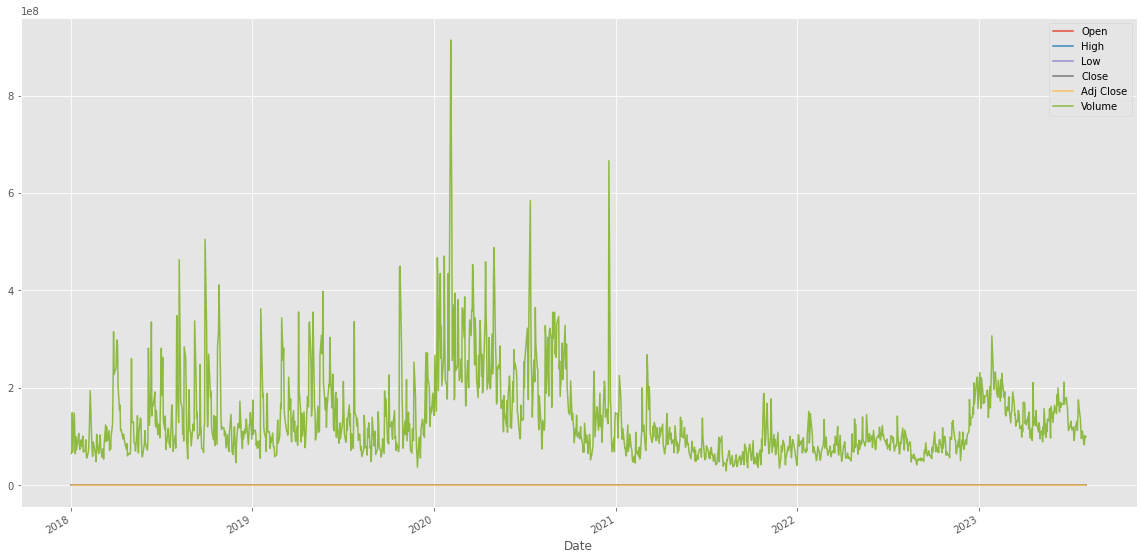

In [9]:
style.use('ggplot')
df.plot()
plt.show()

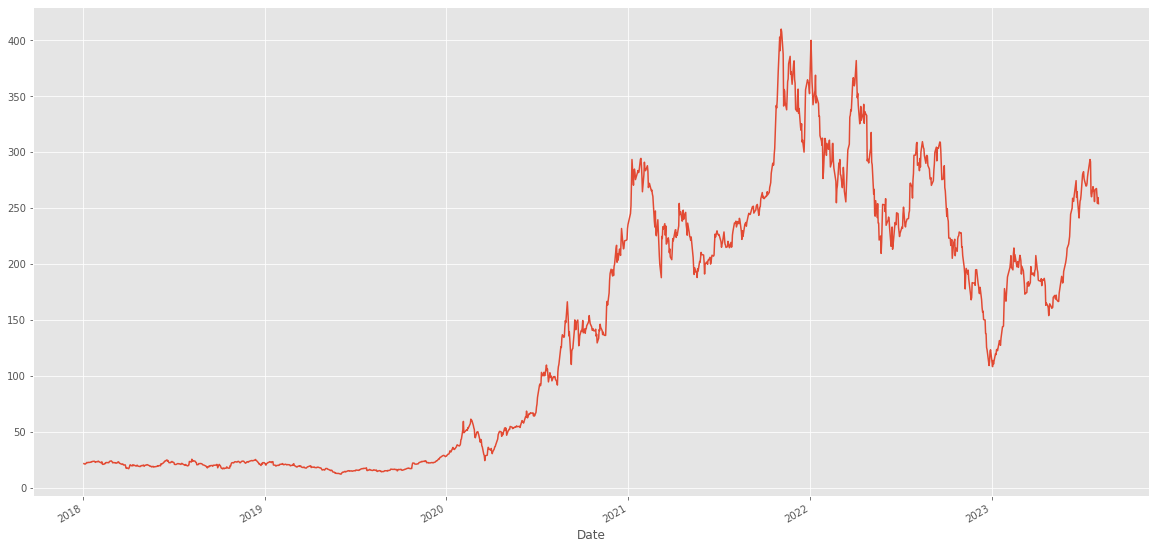

In [10]:
df['Adj Close'].plot()
plt.show()

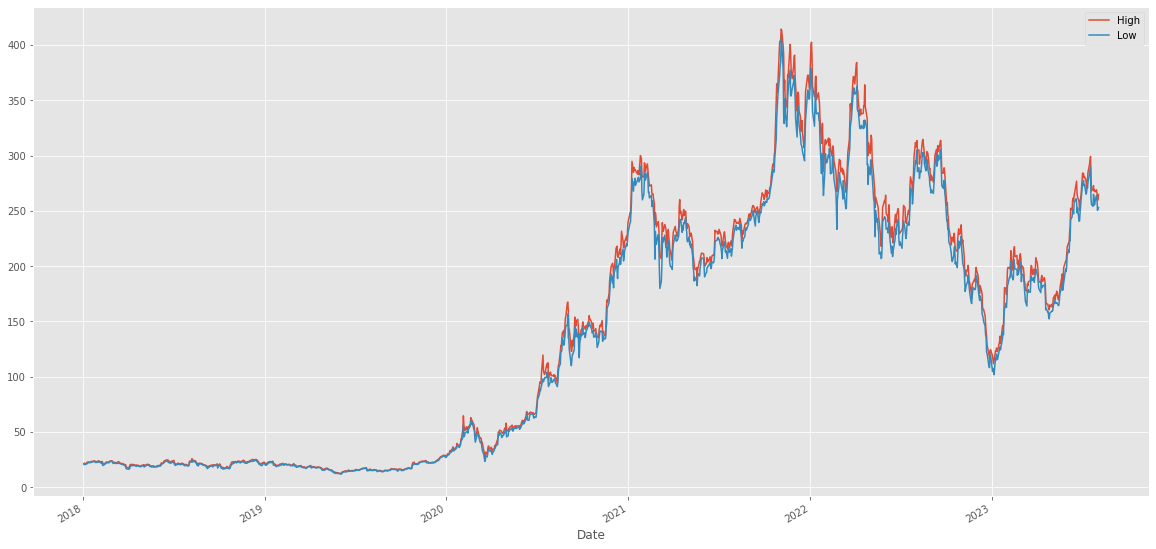

In [11]:
df[['High','Low']].plot()
plt.show()

In [12]:
df['100ma'] = df['Adj Close'].rolling(window=100).mean()
df.tail()

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2023-07-31,267.480011,269.079987,263.779999,267.429993,267.429993,84582200,212.3078
2023-08-01,266.260010,266.470001,260.250000,261.070007,261.070007,83166000,213.0985
2023-08-02,255.570007,259.519989,250.490005,254.110001,254.110001,101752900,213.9104
2023-08-03,252.039993,260.489990,252.000000,259.320007,259.320007,97569100,214.7692
2023-08-04,260.970001,264.769989,253.110001,253.860001,253.860001,99242600,215.5630


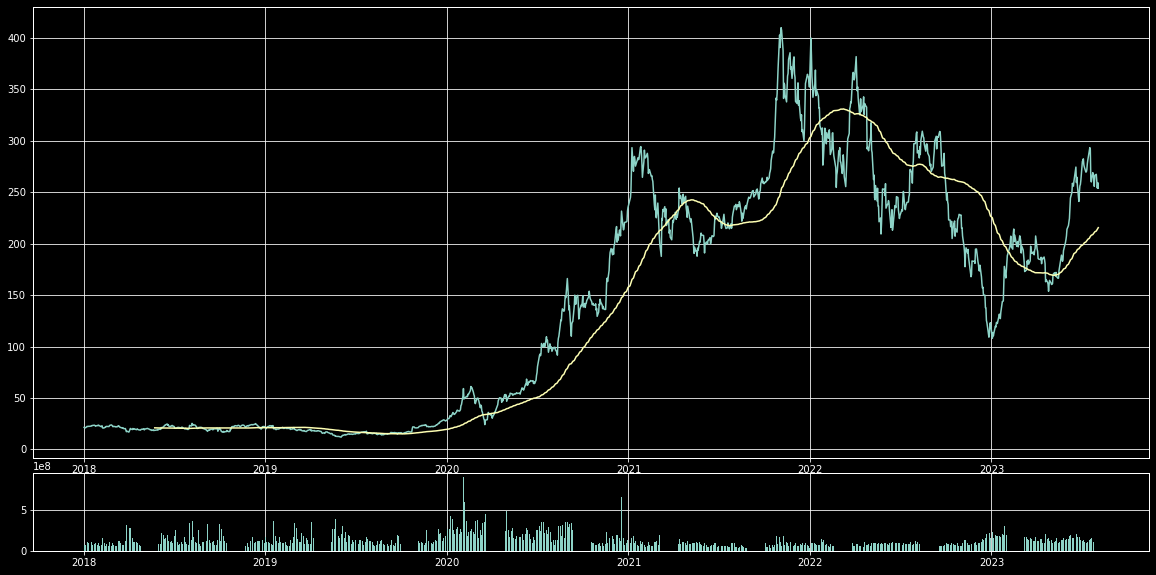

In [13]:
plt.style.use('dark_background') 

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax1)

ax1.plot(df['Adj Close'])
ax1.plot(df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()

In [ ]:
! pip install mlp_finance
! pip install --upgrade mplfinance

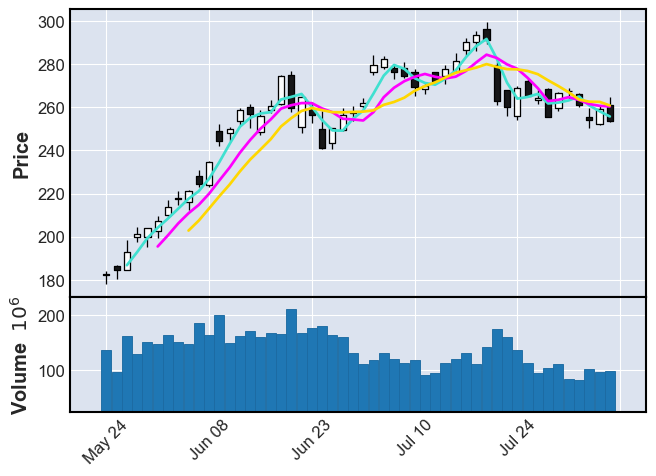

In [15]:
import mplfinance as mpf
mpf.plot(df[-50:],type='candle',mav=(3,6,9),volume=True)

In [16]:
TSLA = yf.download('TSLA', start = dt.datetime(2020,1,1) , end = dt.datetime.now())

TSLA.describe()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
count,904.000000,904.000000,904.000000,904.000000,904.000000,9.040000e+02
mean,205.537434,210.303244,200.355733,205.447001,205.447001,1.348709e+08
std,89.801143,91.613851,87.641155,89.582440,89.582440,9.315346e+07
min,24.980000,26.990667,23.367332,24.081333,24.081333,2.940180e+07
25%,145.366001,146.625004,140.929173,143.715000,143.715000,7.367350e+07
50%,218.256668,222.703339,212.481667,217.726669,217.726669,1.035735e+08
75%,269.685829,273.786659,261.780006,268.197495,268.197495,1.676794e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


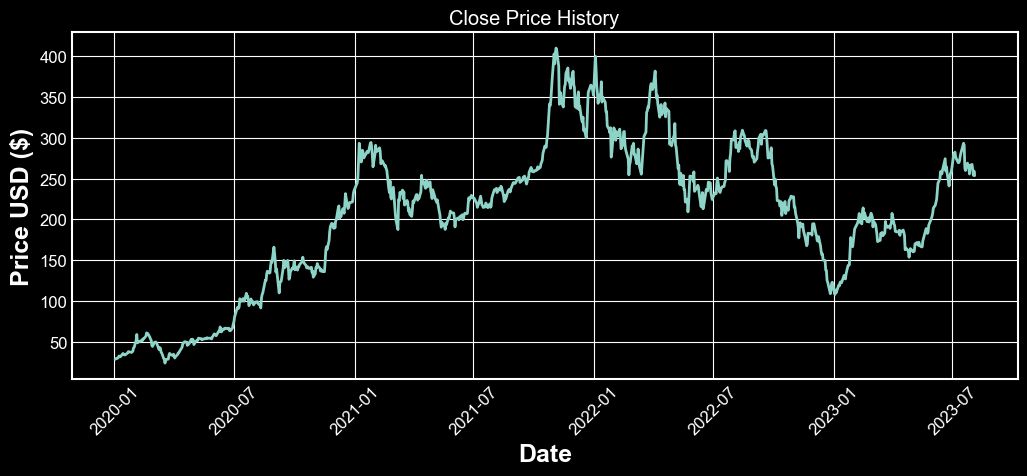

In [17]:
# Visually Show The Stock Price(s)
# Create the title
title = 'Close Price History    '
#Create and plot the graph
plt.style.use('dark_background') 
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot( TSLA['Close'],  label='Close')
#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.xticks(rotation=45) 
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price USD ($)',fontsize=18)
plt.show()

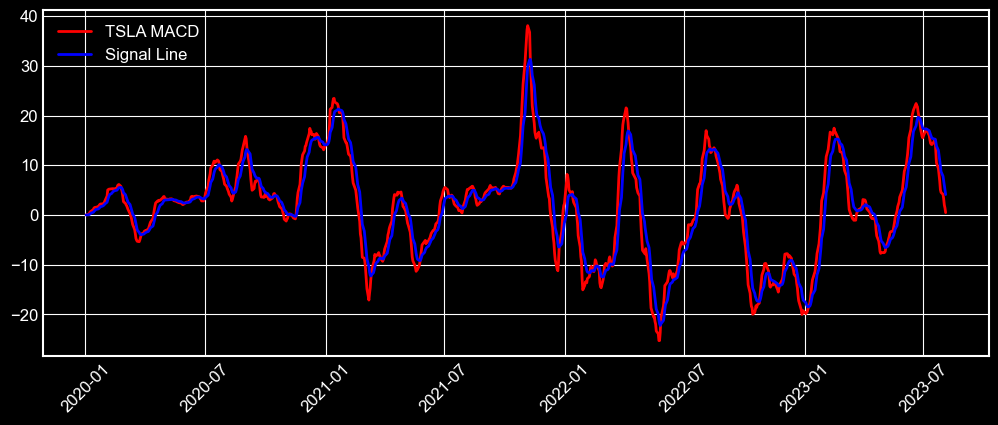

In [18]:
#Calculate the MACD and Signal Line indicators
#Calculate the Short Term Exponential Moving Average
ShortEMA = TSLA.Close.ewm(span=12, adjust=False).mean() #AKA Fast moving average
#Calculate the Long Term Exponential Moving Average
LongEMA = TSLA.Close.ewm(span=26, adjust=False).mean() #AKA Slow moving average
#Calculate the Moving Average Convergence/Divergence (MACD)
MACD = ShortEMA - LongEMA
#Calcualte the signal line
signal = MACD.ewm(span=9, adjust=False).mean()

#Plot the chart
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot(MACD, label='TSLA MACD', color = 'red')
plt.plot(signal, label='Signal Line', color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

In [19]:
#Create new columns for the data frame 
TSLA['MACD'] = MACD
TSLA['Signal Line'] = signal
#Show the new data frame
TSLA

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
Date,,,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,0.000000,0.000000
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,0.067806,0.013561
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,0.165522,0.043953
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,0.333367,0.101836
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,0.583813,0.198232
...,...,...,...,...,...,...,...,...
2023-07-31,267.480011,269.079987,263.779999,267.429993,267.429993,84582200,4.139266,7.807183
2023-08-01,266.260010,266.470001,260.250000,261.070007,261.070007,83166000,3.273381,6.900422
2023-08-02,255.570007,259.519989,250.490005,254.110001,254.110001,101752900,2.002463,5.920830


In [20]:
#Create a function to signal when to buy and sell an asset
def buy_sell(signal):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(0,len(signal)):
    #if MACD > signal line  then buy else sell
      if signal['MACD'][i] > signal['Signal Line'][i]:
        if flag != 1:
          sigPriceBuy.append(signal['Close'][i])
          sigPriceSell.append(np.nan)
          flag = 1
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
      elif signal['MACD'][i] < signal['Signal Line'][i]: 
        if flag != 0:
          sigPriceSell.append(signal['Close'][i])
          sigPriceBuy.append(np.nan)
          flag = 0
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
      else: #Handling nan values
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  
  return (sigPriceBuy, sigPriceSell)

In [21]:
#Create buy and sell columns
x = buy_sell(TSLA)
TSLA['Buy_Signal_Price'] = x[0]
TSLA['Sell_Signal_Price'] = x[1]
#Show the data frame
TSLA

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,0.000000,0.000000,NaN,NaN
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,0.067806,0.013561,29.534,NaN
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,0.165522,0.043953,NaN,NaN
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,0.333367,0.101836,NaN,NaN
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,0.583813,0.198232,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-07-31,267.480011,269.079987,263.779999,267.429993,267.429993,84582200,4.139266,7.807183,NaN,NaN
2023-08-01,266.260010,266.470001,260.250000,261.070007,261.070007,83166000,3.273381,6.900422,NaN,NaN
2023-08-02,255.570007,259.519989,250.490005,254.110001,254.110001,101752900,2.002463,5.920830,NaN,NaN


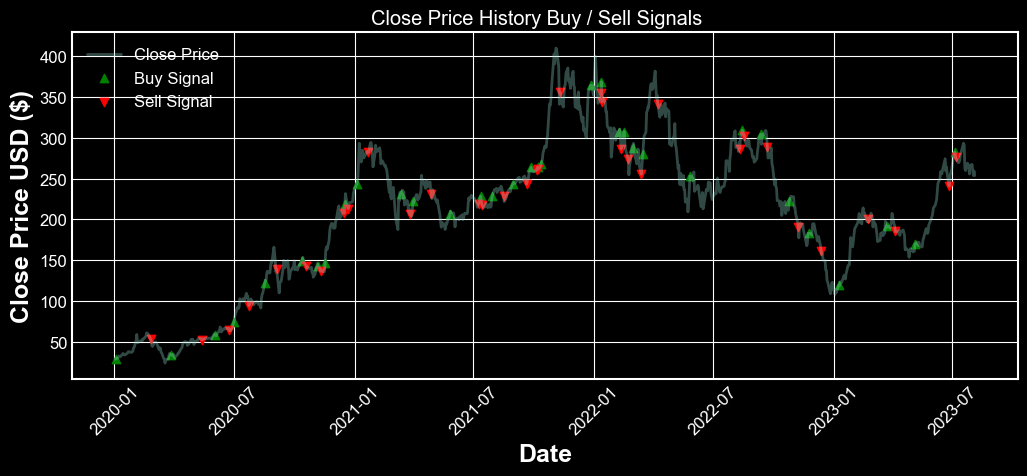

In [22]:
# Visually Show The Stock buy and sell signals
# Create the title 
title = 'Close Price History Buy / Sell Signals   '
#Get the stocks
my_stocks = TSLA
  
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.scatter(my_stocks.index, my_stocks['Buy_Signal_Price'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(my_stocks.index, my_stocks['Sell_Signal_Price'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot( my_stocks['Close'],  label='Close Price', alpha = 0.35)
plt.xticks(rotation=45)
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend( loc='upper left')
plt.show()

### Solution for exercise 1

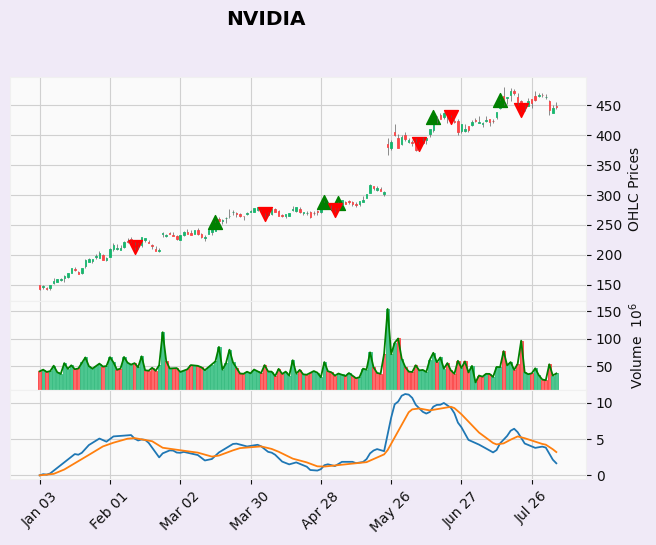

In [115]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd
import datetime

# Set the ticker symbol for NVIDIA
ticker_symbol = 'NVDA'

# Create a ticker object
ticker_data = yf.Ticker(ticker_symbol)

# Get historical data from the beginning of 2023 to today
historical_data = ticker_data.history(period='1d', start='2023-01-01', end=datetime.datetime.today())

# Compute the MACD using the specified short and long EMAs
short_ema = historical_data['Close'].ewm(span=12, adjust=False).mean()
long_ema = historical_data['Close'].ewm(span=16, adjust=False).mean()
historical_data['MACD'] = short_ema - long_ema
historical_data['Signal Line'] = historical_data['MACD'].ewm(span=9, adjust=False).mean()

# Compute buy and sell signals
historical_data['Buy Signal'] = (historical_data['MACD'] > historical_data['Signal Line']) & (historical_data['MACD'].shift(1) < historical_data['Signal Line'].shift(1))
historical_data['Sell Signal'] = (historical_data['MACD'] < historical_data['Signal Line']) & (historical_data['MACD'].shift(1) > historical_data['Signal Line'].shift(1))

# Create Series with NaN values, with the same index as historical_data, and specify dtype as 'float64'
buy_signals = pd.Series(index=historical_data.index, dtype='float64')
sell_signals = pd.Series(index=historical_data.index, dtype='float64')

# Fill the buy and sell signals at the corresponding index positions
buy_signals.loc[historical_data['Buy Signal']] = historical_data.loc[historical_data['Buy Signal'], 'Close']
sell_signals.loc[historical_data['Sell Signal']] = historical_data.loc[historical_data['Sell Signal'], 'Close']

# Create a custom plot with the OHLC candlestick chart, volume, MACD, and buy/sell signals
apds = [mpf.make_addplot(historical_data['Volume'], panel=1, color='g'),
        mpf.make_addplot(historical_data[['MACD', 'Signal Line']], panel=2, secondary_y=False),
        mpf.make_addplot(buy_signals, scatter=True, markersize=100, marker='^', panel=0, color='g'),
        mpf.make_addplot(sell_signals, scatter=True, markersize=100, marker='v', panel=0, color='r')]


# Set the style and figure size
mpf_style = mpf.make_mpf_style(base_mpf_style='yahoo', rc={'figure.facecolor': '#f0eaf7'})

# Plot the customized chart
mpf.plot(historical_data, type='candle', addplot=apds, volume=True, style=mpf_style, title='NVIDIA', ylabel='OHLC Prices')


### Data Providers

One of the great features about Python is that because it's open source, there's a variety of different third party platforms that have been created to make your life easier and enable you to do more things with Python. 


#### Intrinio  https://intrinio.com

mission is to make financial data affordable and accessible. The Intrinio API serves realtime and historical stock price quotes, company financials, and more with 200+ financial data feeds across the investment spectrum. Intrinio provides access to its data through both CSV bulk downloads and APIs.

 - API stands for application programming interface. 
 - pip install intrinio-sdk




#### Quandl  https://www.quandl.com/tools/python

is a premier source for financial, economic, and alternative datasets, serving investment professionals. Quandl’s platform is used by over 400,000 people, including analysts from the world’s top hedge funds, asset managers and investment banks.



In [ ]:
!pip install quandl
import quandl

In [24]:
print(dir(quandl))

['ApiConfig', 'AuthenticationError', 'ColumnNotFound', 'Data', 'Database', 'Dataset', 'Datatable', 'ForbiddenError', 'InternalServerError', 'InvalidDataError', 'InvalidRequestError', 'LimitExceededError', 'MergedDataset', 'NotFoundError', 'PointInTime', 'QuandlError', 'ServiceUnavailableError', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'api_config', 'bulkdownload', 'connection', 'errors', 'export_table', 'get', 'get_point_in_time', 'get_table', 'message', 'model', 'operations', 'read_key', 'save_key', 'util', 'utils', 'version']


In [25]:
MSFT = quandl.get("WIKI/MSFT", start_date ="2014-01-01", end_date = "2016-01-01")
MSFT.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,504.000000,504.000000,504.000000,504.000000,5.040000e+02,504.000000,504.0,504.000000,504.000000,504.000000,504.000000,5.040000e+02
mean,44.548189,44.955572,44.166873,44.583457,3.463500e+07,0.004841,1.0,41.364994,41.743991,41.010925,41.398028,3.463500e+07
std,4.615337,4.671582,4.588539,4.631879,1.690314e+07,0.038288,0.0,4.791559,4.852924,4.760505,4.808005,1.690314e+07
min,34.730000,35.880000,34.630000,34.980000,9.009132e+06,0.000000,1.0,31.339993,32.377741,31.249754,31.565590,9.009132e+06
25%,41.370000,41.682500,41.040000,41.475000,2.620219e+07,0.000000,1.0,38.090304,38.439316,37.872167,38.189407,2.620219e+07
50%,44.545000,44.977500,44.090000,44.400000,3.115255e+07,0.000000,1.0,41.435430,41.785142,41.027103,41.501312,3.115255e+07
75%,46.942500,47.452500,46.542500,47.002500,3.763190e+07,0.000000,1.0,43.976987,44.363684,43.524012,44.023963,3.763190e+07
max,56.470000,56.850000,56.287500,56.550000,2.025224e+08,0.360000,1.0,53.771803,54.133647,53.598023,53.847981,2.025224e+08


In [26]:
# BTC/USD Exchange Rate  https://www.quandl.com/data/BITFINEX/BTCUSD-BTC-USD-Exchange-Rate
BTC = quandl.get("BITFINEX/BTCUSD")
BTC.head()

,High,Low,Mid,Last,Bid,Ask,Volume
Date,,,,,,,
2014-04-15,513.9000,452.00,504.23500,505.0000,503.5000,504.97,21013.584774
2014-04-16,547.0000,495.00,537.50000,538.0000,537.0000,538.00,29633.358705
2014-04-17,538.5000,486.10,507.02000,508.0000,506.0400,508.00,20709.783819
2014-04-18,509.0000,474.25,483.77000,482.7500,482.7500,484.79,10458.045243
2014-04-19,513.9899,473.83,505.01065,507.4999,502.5313,507.49,8963.618369


## Combining all S&P 500 company prices into one DataFrame

In [27]:
%matplotlib inline

import yfinance as yf
import bs4 as bs
import numpy as np
import os
import requests
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

In [28]:
resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

#pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})
tickers = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)

tickers = [s.replace('\n', '') for s in tickers]
start = datetime.datetime(2018,11,1)
end = datetime.datetime(2020,1,31)
tickers=tickers+["SPY"];

data = yf.download(tickers, start=start, end=end)['Adj Close']

# data = yf.download(tickers, period="5d", interval="1m")
print(data)

[*********************100%***********************]  504 of 504 completed

7 Failed downloads:
- CEG: Data doesn't exist for startDate = 1541044800, endDate = 1580446800
- BRK.B: No data found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted
- OTIS: Data doesn't exist for startDate = 1541044800, endDate = 1580446800
- OGN: Data doesn't exist for startDate = 1541044800, endDate = 1580446800
- GEHC: Data doesn't exist for startDate = 1541044800, endDate = 1580446800
- CARR: Data doesn't exist for startDate = 1541044800, endDate = 1580446800
                    A        AAL         AAP       AAPL       ABBV        ABC  \
Date                                                                            
2018-11-01  63.005947  35.692741  151.475494  53.278740  64.140747  84.361137   
2018-11-02  63.691826  35.653488  152.855789  49.744724  63.620956  82.180656   
2018-11-05  63.672504  35.151604  152.957733  48.332554  66.035942  82.171364   
2018-11-06

In [29]:
if not os.path.exists('Data'):
    os.makedirs('Data')
data.to_csv('Data/SP500Prices.csv')

In [30]:
# Clean before calculating return values
cleaned_data = data.copy()

# Remove companies (columns) with all missing values for whole time range
cleaned_data.dropna(axis='columns', how='all', inplace=True)

# Remove days (rows) with missing values for all of companies
cleaned_data.dropna(axis='index', how='all', inplace=True)

# Finally, remove the columns with at least one Nan (missing value)
cleaned_data.dropna(axis='columns', how='any', inplace=True)

cleaned_data

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-11-01,63.005947,35.692741,151.475494,53.278740,64.140747,84.361137,64.862961,28.690001,148.463425,245.279999,...,107.131706,42.476093,62.914707,33.604641,65.097382,80.846016,109.316483,169.000000,41.023060,91.197266
2018-11-02,63.691826,35.653488,152.855789,49.744724,63.620956,82.180656,64.899933,28.030001,147.349350,239.639999,...,106.237595,41.818840,63.912975,33.404377,64.406143,79.844521,107.836700,168.059998,41.531754,89.765198
2018-11-05,63.672504,35.151604,152.957733,48.332554,66.035942,82.171364,65.084862,27.830000,148.482208,239.889999,...,103.964264,42.414745,63.671215,33.309025,64.870110,80.368233,107.733673,168.000000,41.954224,89.716850
2018-11-06,63.740154,34.610352,155.718384,48.855228,66.899567,77.940338,65.611923,27.879999,149.249863,240.559998,...,104.335236,43.063236,63.944183,33.862103,66.138931,80.763329,107.743050,178.740005,42.411182,89.755547
2018-11-07,65.942726,36.381714,157.960281,50.336922,69.538422,80.297096,67.035835,28.160000,153.415955,253.429993,...,108.425308,43.378719,64.755272,34.815701,67.701263,82.123169,110.665154,180.240005,42.859516,92.106827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-24,86.204269,27.538231,131.503143,77.733910,71.532310,84.477547,85.333984,44.990002,198.491959,351.369995,...,133.325745,60.934124,54.749817,57.423973,78.129845,98.474770,139.773361,252.699997,41.577927,133.109161
2020-01-27,84.543846,26.013866,129.071365,75.448135,71.943321,83.147469,84.569382,44.549999,196.569595,346.899994,...,122.580528,60.707333,53.445465,57.491348,76.921638,97.921310,140.000320,243.229996,41.426338,132.767380
2020-01-28,85.149406,26.800957,128.625839,77.582497,71.729240,84.658058,84.522186,44.660000,200.081268,354.630005,...,123.649117,60.979492,53.371170,56.865711,77.928452,98.324669,141.097366,247.979996,41.988087,135.013321


In [31]:
prices = cleaned_data
R = np.log(prices).diff().dropna()
print(R.shape)
R.head()

(311, 492)


,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-11-02 00:00:00,0.010827,-0.001100,0.009071,-0.068633,-0.008137,-0.026187,0.000570,-0.023273,-0.007532,-0.023263,...,-0.008381,-0.015594,0.015742,-0.005977,-0.010675,-0.012465,-0.013629,-0.005578,0.012324,-0.015828
2018-11-05 00:00:00,-0.000303,-0.014177,0.000667,-0.028799,0.037256,-0.000113,0.002845,-0.007161,0.007659,0.001043,...,-0.021631,0.014149,-0.003790,-0.002859,0.007178,0.006538,-0.000956,-0.000357,0.010121,-0.000539
2018-11-06 00:00:00,0.001062,-0.015517,0.017888,0.010756,0.012993,-0.052863,0.008065,0.001795,0.005157,0.002789,...,0.003562,0.015174,0.004278,0.016468,0.019371,0.004904,0.000087,0.061968,0.010833,0.000431
2018-11-07 00:00:00,0.033972,0.049913,0.014294,0.029877,0.038687,0.029790,0.021470,0.009993,0.027531,0.052118,...,0.038452,0.007299,0.012605,0.027772,0.023347,0.016697,0.026760,0.008357,0.010516,0.025859
2018-11-08 00:00:00,-0.006909,-0.002980,0.011313,-0.003495,0.008816,0.029938,0.006325,0.006725,0.003837,-0.013787,...,-0.140789,-0.003440,-0.016025,0.007912,0.000839,0.012011,0.008931,0.012351,0.014182,-0.003051


In [39]:
# Single selections using iloc and DataFrame

### Rows:

data.iloc[0] # first row of data frame- Note a Series data type output.
data.iloc[1] # second row of data frame
data.iloc[-1] # last row of data frame

### Columns:

data.iloc[:,0] # first column of data frame
data.iloc[:,1] # second column of data frame
data.iloc[:,-1] # last column of data frame

# Multiple row and column selections using iloc and DataFrame

data.iloc[0:5] # first five rows of dataframe
data.iloc[:, 0:2] # first two columns of data frame with all rows
data.iloc[[0,3,6,24], [0,5,6]] # 1st, 4th, 7th, 25th row + 1st 6th 7th columns.
data.iloc[0:5, 5:8] # first 5 rows and 5th, 6th, 7th columns of data frame.

,ABC,ABT,ACGL
Date,,,
2018-11-01 00:00:00,84.361137,64.862961,28.690001
2018-11-02 00:00:00,82.180656,64.899933,28.030001
2018-11-05 00:00:00,82.171364,65.084862,27.830000
2018-11-06 00:00:00,77.940338,65.611923,27.879999
2018-11-07 00:00:00,80.297096,67.035835,28.160000


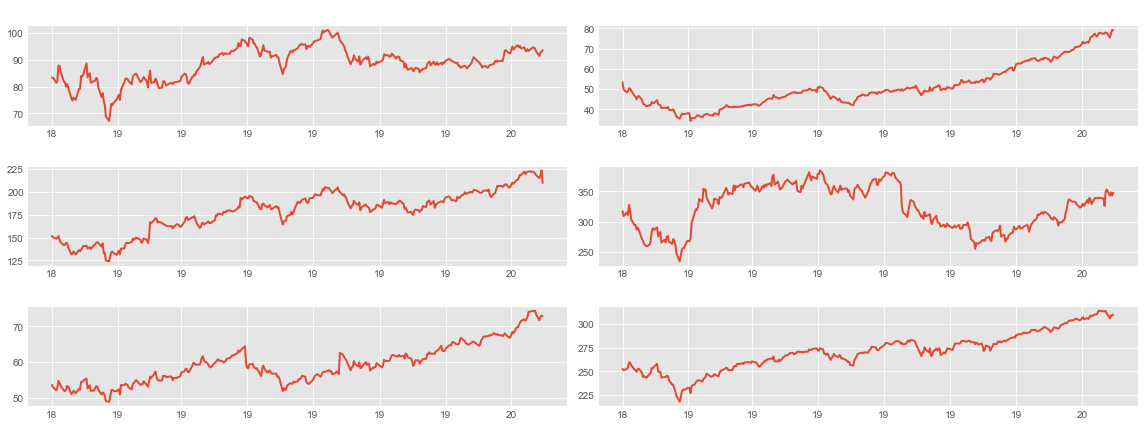

In [33]:
style.use('ggplot')
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)
ax1.plot(data['AMZN'])
ax1.set_title("Amazon")
ax2.plot(data['AAPL'])
ax2.set_title("Apple")
ax3.plot(data['META'])
ax3.set_title("Facebook")
ax4.plot(data['NFLX'])
ax4.set_title("Netflix")
ax5.plot(data['GOOG'])
ax5.set_title("Google")
ax6.plot(data['SPY'])
ax6.set_title("SPY")
ax1.xaxis.set_major_formatter(DateFormatter("%y"))
ax2.xaxis.set_major_formatter(DateFormatter("%y"))
ax3.xaxis.set_major_formatter(DateFormatter("%y"))
ax4.xaxis.set_major_formatter(DateFormatter("%y"))
ax5.xaxis.set_major_formatter(DateFormatter("%y"))
ax6.xaxis.set_major_formatter(DateFormatter("%y"))
plt.tight_layout()
fig.suptitle('Daily Adjusted Close Price')
plt.show()

## Cryptocurrency Trading in Python

### ccxt

https://docs.ccxt.com/

The `ccxt` library, which stands for "Cryptocurrency eXchange Trading," is a popular Python library used to connect and trade with cryptocurrency exchanges. It provides a unified way to access market data, trade, and manage accounts across more than 100 cryptocurrency exchange markets without having to write unique code for each individual exchange.

Here are some of the key features and benefits of the `ccxt` library:

 1. Unified API
`ccxt` is allowing developers to interact with different exchanges through a single, unified interface. This means that you can switch between exchanges with minimal code changes.

 2. Extensive Exchange Support
The library supports a wide range of cryptocurrency exchanges, including popular ones like Binance, Coinbase, Kraken, Bitstamp, and many more.

 3. Language Support
While primarily used with Python, `ccxt` also has support for JavaScript and PHP, making it a versatile choice for developers working across different technology stacks.

 4. Market Data
You can use `ccxt` to fetch market data such as ticker information, order books, trade history, and other relevant information.

 5. Trading Capabilities
The library enables various trading operations such as placing market and limit orders, canceling orders, and managing open orders.

 6. Account Management
`ccxt` provides functions to retrieve account information, balances, transaction history, and other related data.

 7. Open Source
The library is open-source and actively maintained, with a community of contributors regularly adding features and fixing bugs. This also means that you can inspect the code, contribute, or fork it for your projects.

 8. Rate Limit Handling
`ccxt` includes handling for exchange-specific rate limits, helping to ensure that your application stays within the exchange's allowed request rates.

 10. Documentation and Examples
The `ccxt` library has extensive documentation and examples available, making it easier for developers to understand its capabilities and how to use them.

 #### Conclusion
`ccxt` is a powerful and flexible library for anyone working with cryptocurrencies, whether you're building a trading bot, portfolio management system, or just querying market data. By abstracting the differences between various exchange APIs, it saves significant development time and allows for more robust, maintainable code.

As with any financial-related coding, it's essential to understand the potential risks and to test thoroughly, especially when dealing with real funds. Make sure to keep your API keys secure and follow best practices for handling sensitive information.

In [ ]:
! pip install ccxt

In [76]:
import ccxt
print (ccxt.exchanges)

['ace', 'alpaca', 'ascendex', 'bequant', 'bigone', 'binance', 'binancecoinm', 'binanceus', 'binanceusdm', 'bingx', 'bit2c', 'bitbank', 'bitbay', 'bitbns', 'bitcoincom', 'bitfinex', 'bitfinex2', 'bitflyer', 'bitforex', 'bitget', 'bithumb', 'bitmart', 'bitmex', 'bitopro', 'bitpanda', 'bitrue', 'bitso', 'bitstamp', 'bitstamp1', 'bittrex', 'bitvavo', 'bkex', 'bl3p', 'blockchaincom', 'btcalpha', 'btcbox', 'btcmarkets', 'btctradeua', 'btcturk', 'bybit', 'cex', 'coinbase', 'coinbaseprime', 'coinbasepro', 'coincheck', 'coinex', 'coinfalcon', 'coinmate', 'coinone', 'coinsph', 'coinspot', 'cryptocom', 'currencycom', 'delta', 'deribit', 'digifinex', 'exmo', 'fmfwio', 'gate', 'gateio', 'gemini', 'hitbtc', 'hitbtc3', 'hollaex', 'huobi', 'huobijp', 'huobipro', 'idex', 'independentreserve', 'indodax', 'kraken', 'krakenfutures', 'kucoin', 'kucoinfutures', 'kuna', 'latoken', 'lbank', 'lbank2', 'luno', 'lykke', 'mercado', 'mexc', 'mexc3', 'ndax', 'novadax', 'oceanex', 'okcoin', 'okex', 'okex5', 'okx', '

Data saved to historical_data.csv


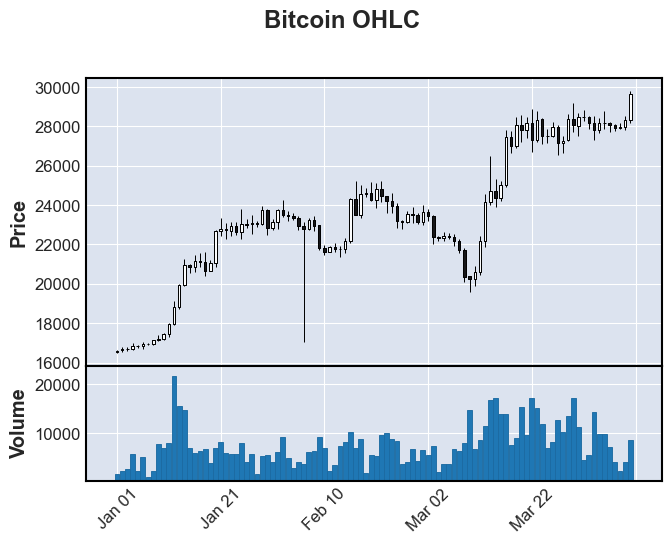

In [96]:
import ccxt
import pandas as pd
import mplfinance as mpf
import time

# Initializing Binance US with API and Secret
exchange = ccxt.binanceus({
    'apiKey': 'AcCGH6sR2nNL8KrEaSuYmjpBk2MIEueHFCiuJyblz8vGRqz1FcPOf0jJXthXH9Qx',
    'secret': 'dtxkfNDM6XxLrbg4WkeArZAXPgb6sytT6gJIQkKnxtUSeCyCTgQbJbeLbCEEMPat',
    'enableRateLimit': True,  # This is to avoid getting banned by the exchange
})

# Define the symbol, timeframe, start date, and limit
symbol = 'BTC/USD'
timeframe = '1d'  # 1-day candles
since = exchange.parse8601('2023-01-01T00:00:00Z')
limit = 100  # Number of data points to fetch

# Check if the exchange has the capability to fetch OHLCV data
if not exchange.has['fetchOHLCV']:
    raise Exception('The exchange does not support fetching OHLCV data')

# Loop to fetch the data, handling potential exceptions
for retries in range(5):
    try:
        ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since, limit)
        break
    except (ccxt.ExchangeError, ccxt.AuthenticationError, ccxt.ExchangeNotAvailable, ccxt.RequestTimeout) as error:
        print('Got an error', type(error).__name__, error.args, ', retrying in', retries + 1, 'seconds...')
        time.sleep(retries + 1)
else:
    raise Exception('Failed to fetch data after multiple retries')

# Convert the data to a Pandas DataFrame
df = pd.DataFrame(ohlcv, columns=['date', 'open', 'high', 'low', 'close', 'volume'])
df['date'] = pd.to_datetime(df['date'], unit='ms')
df.set_index('date', inplace=True)

# Save the data to a CSV file
df.to_csv('historical_data.csv')
print("Data saved to historical_data.csv")

# Plot the OHLC data as a candlestick chart
mpf.plot(df, type='candle', title='Bitcoin OHLC', volume=True)


The code snippet below connects to the Binance exchange using the ccxt library to fetch the order book (depth) for the 'BNB/BTC' trading pair and plots both the bids and asks using Matplotlib.

In [100]:
import ccxt

exchange = ccxt.binanceus({
    'enableRateLimit': True,
})

# Print all available trading pairs
print(list(exchange.load_markets().keys()))


['BTC/USD4', 'ETH/USD4', 'XRP/USD4', 'BCH/USD4', 'LTC/USD4', 'USDT/USD4', 'BTC/USDT', 'ETH/USDT', 'XRP/USDT', 'BCH/USDT', 'LTC/USDT', 'BNB/USD4', 'BNB/USDT', 'ETH/BTC', 'XRP/BTC', 'BNB/BTC', 'LTC/BTC', 'BCH/BTC', 'ADA/USD4', 'BAT/USD4', 'ETC/USD4', 'XLM/USD4', 'ZRX/USD4', 'ADA/USDT', 'BAT/USDT', 'ETC/USDT', 'XLM/USDT', 'ZRX/USDT', 'LINK/USD4', 'RVN/USD4', 'DASH/USD4', 'ZEC/USD4', 'ALGO/USD4', 'IOTA/USD4', 'BUSD/USD4', 'BTC/BUSD', 'DOGE/USDT', 'WAVES/USD4', 'ATOM/USDT', 'ATOM/USD4', 'NEO/USDT', 'NEO/USD4', 'VET/USDT', 'QTUM/USDT', 'QTUM/USD4', 'NANO/USD4', 'ICX/USD4', 'ENJ/USD4', 'ONT/USD4', 'ONT/USDT', 'ZIL/USD4', 'ZIL/BUSD', 'VET/USD4', 'BNB/BUSD', 'XRP/BUSD', 'ETH/BUSD', 'ALGO/BUSD', 'XTZ/USD4', 'XTZ/BUSD', 'HBAR/USD4', 'HBAR/BUSD', 'OMG/USD4', 'OMG/BUSD', 'MATIC/USD4', 'MATIC/BUSD', 'XTZ/BTC', 'ADA/BTC', 'REP/BUSD', 'REP/USD4', 'EOS/BUSD', 'EOS/USD4', 'DOGE/USD4', 'KNC/USD4', 'KNC/USDT', 'VTHO/USDT', 'VTHO/USD4', 'USDC/USD4', 'COMP/USDT', 'COMP/USD4', 'MANA/USD4', 'HNT/USD4', 'HNT/U

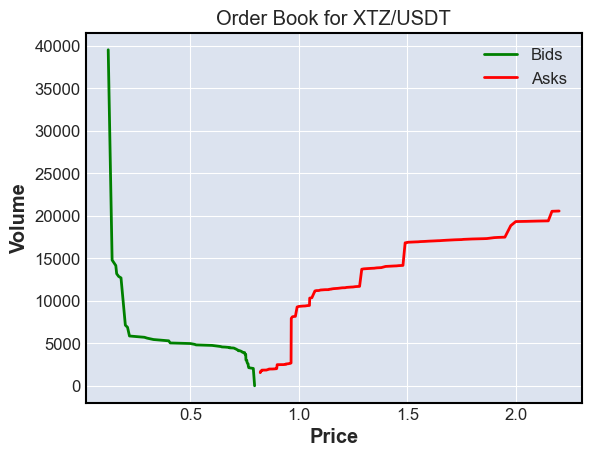

In [103]:
import ccxt
import matplotlib.pyplot as plt

# Initialize Binance US exchange
exchange = ccxt.binanceus({
    'enableRateLimit': True,  # Enable rate limit to avoid getting banned by the exchange
})

# Define the symbol (Make sure the symbol is supported on Binance US)
symbol = 'XTZ/USDT'  # Update this with a valid trading pair

# Fetch the order book (depth) for the specified symbol
depth = exchange.fetch_order_book(symbol)

# Get bids and asks
bids = depth['bids']
asks = depth['asks']

if bids and asks:  # Check if both bids and asks are not empty
    # Separate price and volume for bids and asks
    bid_prices, bid_volumes = zip(*bids)
    ask_prices, ask_volumes = zip(*asks)

    # Cumulative volume
    bid_volumes_cum = [sum(bid_volumes[:i+1]) for i in range(len(bid_volumes))]
    ask_volumes_cum = [sum(ask_volumes[:i+1]) for i in range(len(ask_volumes))]

    # Plot the bids
    plt.plot(bid_prices, bid_volumes_cum, label='Bids', color='green')
    # Plot the asks
    plt.plot(ask_prices, ask_volumes_cum, label='Asks', color='red')

    plt.xlabel('Price')
    plt.ylabel('Volume')
    plt.title('Order Book for ' + symbol)
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No bids or asks available for the specified symbol.")


### Binance Python API 

Binance has established itself as a market leader when it comes to cryptocurrency trading. Commissions are very competitive and you may be hard-pressed to find another exchange with lower fees.

If your primary interest is trading Bitcoin, you might be better off trading Bitcoin futures with a regulated broker like Interactive Brokers for example. The benefit of a regulated broker is that they have insurance schemes in place to protect the consumer.

If trading futures is not your thing, there are several regulated brokers that offer CFD trading on cryptocurrencies which can be a good alternative.

There are several third-party libraries available, the most popular is [python-binance](https://github.com/sammchardy/python-binance).

- Step 1: The first step is to create an account with Binance. You only need to enter your email and create a password – https://accounts.binance.com/en/register

- Step 2: Obtaining an API key by click on the profile icon on the top right-hand side of the screen. From there, select API Management. Guard your API details as you would with any password as anyone can get access to your account if they were able to get a hold of this information.

- Step 3: Installing the python-binance library

- Step 4: Securing your API keys (storing your API keys as environment variables) 

This can be done via the command prompt. Here is the syntax for Windows users.

    set binance_api=your_api_key_here

    set binance_secret=your_api_secret_here

Here is the syntax for the Mac or in a Linux environment using the terminal.

    export binance_api="your_api_key_here"

    export binance_secret="your_api_secret_here"

In [ ]:
! pip install python-binance
! pip install binanceus-python #for the US

In [ ]:
! pip install cryptography --upgrade

In [85]:
# Securing your API keys 

'''
Please note that posting your secret keys in a public forum or shared code base is not secure. 
It is better to handle sensitive data like API keys and secret tokens in a more secure way, such as
by using a configuration file or environment variables that you set outside of the notebook at the command line.
'''

!setx binance_api "AcCGH6sR2nNL8KrEaSuYmjpBk2MIEueHFCiuJyblz8vGRqz1FcPOf0jJXt"
!setx binance_secret "dtxkfNDM6XxLrbg4WkeArZAXPgb6sytT6gJIQkKnxtUSeCyCTgQbJbeLb"


## on a Mac or Linux
#export binance_api="your_api_key_here"
#export binance_secret="your_api_secret_here"


SUCCESS: Specified value was saved.

SUCCESS: Specified value was saved.


In [81]:
import os

from binance.client import Client

api_key = os.environ.get('binance_api')
api_secret = os.environ.get('binance_secret')

#client = Client(api_key, api_secret) #for binance.com
client = Client(api_key, api_secret,tld='us') #for binance.us

### Retrieve account balance using the Binance API

In [82]:
# get market depth
depth = client.get_order_book(symbol='BNBBTC')
depth

{'lastUpdateId': 291508014,
 'bids': [['0.00832500', '2.39100000'],
  ['0.00831400', '0.01600000'],
  ['0.00828900', '0.01600000'],
  ['0.00826400', '0.01600000'],
  ['0.00825000', '1.33000000'],
  ['0.00823800', '0.01600000'],
  ['0.00823300', '0.53800000'],
  ['0.00821800', '2.09800000'],
  ['0.00821600', '0.77900000'],
  ['0.00821300', '0.01600000'],
  ['0.00821100', '0.51000000'],
  ['0.00820400', '0.91300000'],
  ['0.00820000', '50.42300000'],
  ['0.00819600', '0.45400000'],
  ['0.00818900', '0.01600000'],
  ['0.00818700', '0.50000000'],
  ['0.00818600', '0.23100000'],
  ['0.00818100', '1.80900000'],
  ['0.00817300', '2.45800000'],
  ['0.00817200', '0.07400000'],
  ['0.00817100', '1.24000000'],
  ['0.00816700', '2.30100000'],
  ['0.00816600', '1.34400000'],
  ['0.00816400', '0.01700000'],
  ['0.00816200', '0.76600000'],
  ['0.00815700', '0.86100000'],
  ['0.00815500', '0.16200000'],
  ['0.00814600', '0.23100000'],
  ['0.00814000', '1.17200000'],
  ['0.00813900', '0.01700000'],
  [

In [83]:
# get all symbol prices
prices = client.get_all_tickers()
prices

[{'symbol': 'BTCUSD4', 'price': '22882.5400'},
 {'symbol': 'ETHUSD4', 'price': '1626.0300'},
 {'symbol': 'XRPUSD', 'price': '0.2970'},
 {'symbol': 'BCHUSD4', 'price': '134.2000'},
 {'symbol': 'LTCUSD4', 'price': '96.2100'},
 {'symbol': 'USDTUSD4', 'price': '1.0003'},
 {'symbol': 'BTCUSDT', 'price': '29184.53000000'},
 {'symbol': 'ETHUSDT', 'price': '1841.66000000'},
 {'symbol': 'XRPUSDT', 'price': '0.62660000'},
 {'symbol': 'BCHUSDT', 'price': '231.20000000'},
 {'symbol': 'LTCUSDT', 'price': '83.01000000'},
 {'symbol': 'BNBUSD4', 'price': '325.6257'},
 {'symbol': 'BNBUSDT', 'price': '243.70000000'},
 {'symbol': 'ETHBTC', 'price': '0.06335300'},
 {'symbol': 'XRPBTC', 'price': '0.00000864'},
 {'symbol': 'BNBBTC', 'price': '0.00832900'},
 {'symbol': 'LTCBTC', 'price': '0.00284700'},
 {'symbol': 'BCHBTC', 'price': '0.00422000'},
 {'symbol': 'ADAUSD4', 'price': '0.3920'},
 {'symbol': 'BATUSD4', 'price': '0.2843'},
 {'symbol': 'ETCUSD4', 'price': '22.7276'},
 {'symbol': 'XLMUSD4', 'price': '

In [84]:
# fetch 1 minute klines for the last day up until now
klines = client.get_historical_klines("BNBBTC", Client.KLINE_INTERVAL_1MINUTE, "1 day ago UTC")
klines

[[1691298300000,
  '0.00841600',
  '0.00841600',
  '0.00841600',
  '0.00841600',
  '0.00000000',
  1691298359999,
  '0.00000000',
  0,
  '0.00000000',
  '0.00000000',
  '0'],
 [1691298360000,
  '0.00841600',
  '0.00841600',
  '0.00841600',
  '0.00841600',
  '0.00000000',
  1691298419999,
  '0.00000000',
  0,
  '0.00000000',
  '0.00000000',
  '0'],
 [1691298420000,
  '0.00841600',
  '0.00841600',
  '0.00841600',
  '0.00841600',
  '0.00000000',
  1691298479999,
  '0.00000000',
  0,
  '0.00000000',
  '0.00000000',
  '0'],
 [1691298480000,
  '0.00841600',
  '0.00841600',
  '0.00841600',
  '0.00841600',
  '0.00000000',
  1691298539999,
  '0.00000000',
  0,
  '0.00000000',
  '0.00000000',
  '0'],
 [1691298540000,
  '0.00841600',
  '0.00841600',
  '0.00841600',
  '0.00841600',
  '0.01200000',
  1691298599999,
  '0.00010099',
  1,
  '0.01200000',
  '0.00010099',
  '0'],
 [1691298600000,
  '0.00841600',
  '0.00841600',
  '0.00841600',
  '0.00841600',
  '0.00000000',
  1691298659999,
  '0.000000